# Data Characteristics on new raw data

In [5]:
import pandas as pd

import sys
sys.path.append('../0_DataPreparation')
from utils import plot_missing_heatmap


# read cleaned datasets from ../data/processed
df_train_clean = pd.read_csv("../data/processed/df_train_data_cleaned.csv")
df_validation_clean = pd.read_csv("../data/processed/df_validation_data_cleaned.csv")
df_test_clean = pd.read_csv("../data/processed/df_test_data_cleaned.csv")

# convert Datum column to datetime
df_train_clean['Datum'] = pd.to_datetime(df_train_clean['Datum'])
df_validation_clean['Datum'] = pd.to_datetime(df_validation_clean['Datum'])
df_test_clean['Datum'] = pd.to_datetime(df_test_clean['Datum'])

# print column of each dataframe
print("Train Data Columns:", df_train_clean.columns.tolist())
print("Validation Data Columns:", df_validation_clean.columns.tolist())
print("Test Data Columns:", df_test_clean.columns.tolist())

Train Data Columns: ['Datum', 'KielerWoche_kiwo', 'Bewoelkung_weather', 'Temperatur_weather', 'Windgeschwindigkeit_weather', 'Warengruppe_umsatz', 'Umsatz_umsatz', 'umsatz_rolling7', 'day_of_week', 'is_saturday', 'is_sunday', 'sunshine_duration', 'temperature_2m_mean', 'sunshine_hours', 'public_holiday', 'school_holiday']
Validation Data Columns: ['Datum', 'KielerWoche_kiwo', 'Bewoelkung_weather', 'Temperatur_weather', 'Windgeschwindigkeit_weather', 'Warengruppe_umsatz', 'Umsatz_umsatz', 'umsatz_rolling7', 'day_of_week', 'is_saturday', 'is_sunday', 'sunshine_duration', 'temperature_2m_mean', 'sunshine_hours', 'public_holiday', 'school_holiday', 'month']
Test Data Columns: ['Datum', 'KielerWoche_kiwo', 'Bewoelkung_weather', 'Temperatur_weather', 'Windgeschwindigkeit_weather', 'id', 'Warengruppe_umsatz', 'day_of_week', 'is_saturday', 'is_sunday', 'sunshine_duration', 'temperature_2m_mean', 'sunshine_hours', 'public_holiday', 'school_holiday']


## Corelation

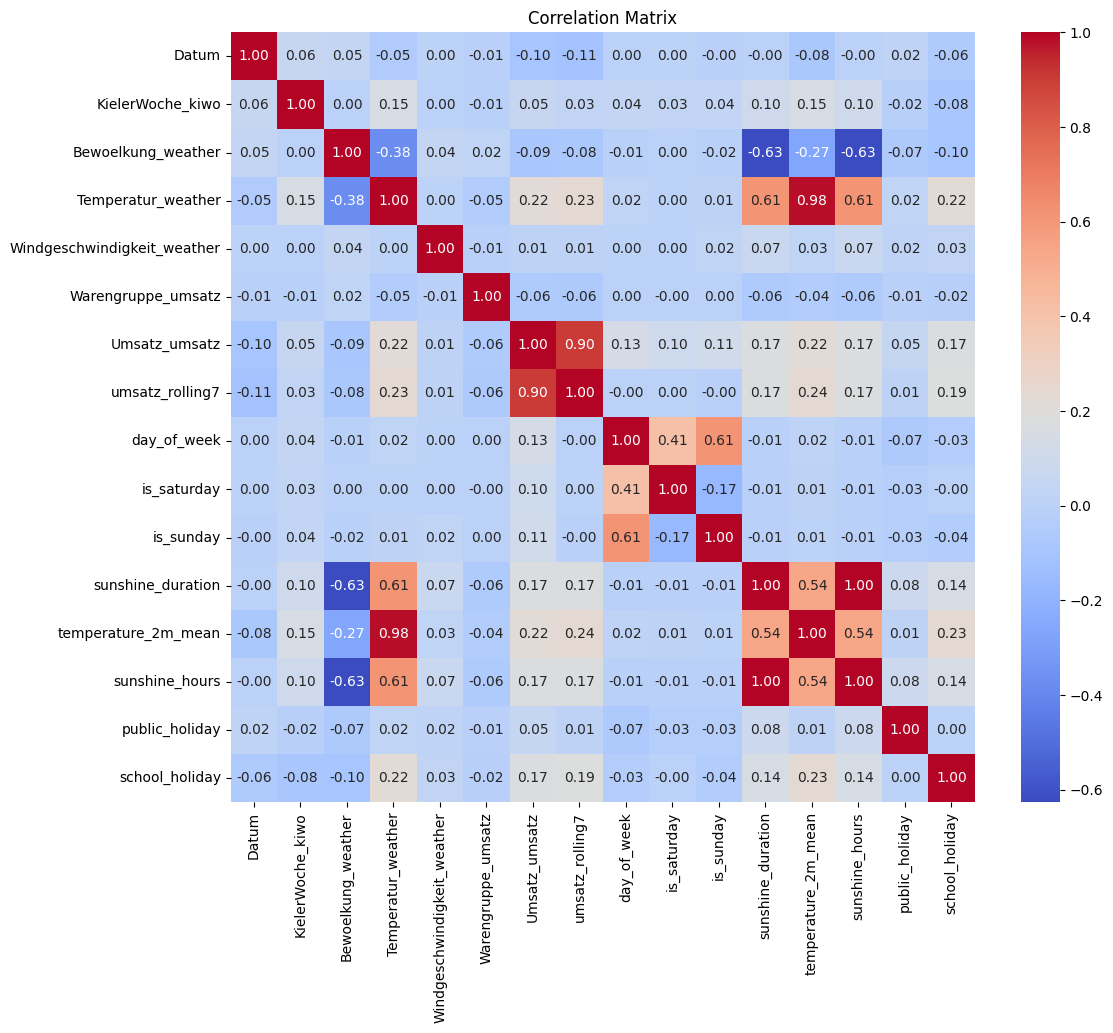

In [6]:
# use scater plot to plot Umsatz_umsatz vs all other numerical columns in df_train_data_cleaned
import matplotlib.pyplot as plt
import seaborn as sns

# print correlation matrix of df_train_data_cleaned
plt.figure(figsize=(12, 10))
correlation_matrix = df_train_clean.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:

# Assume df_train_data_cleaned has features X and target y
X = df_train_clean.drop(columns=['Umsatz_umsatz', 'Datum', 'umsatz_rolling7','temperature_2m_mean'])  # Exclude target, date, and rolling7
y = df_train_clean['Umsatz_umsatz']

# Handle categorical features (e.g., encode holidays if needed)
X = pd.get_dummies(X, drop_first=True)

In [8]:
# train a linear regression model for comparison
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# drop rolling7 feature if exists
if 'umsatz_rolling7' in X.columns:
    X = X.drop(columns=['umsatz_rolling7'])
# drop Windgeschwindigkeit_weather, month
if 'Windgeschwindigkeit_weather' in X.columns:
    X = X.drop(columns=['Windgeschwindigkeit_weather'])
if 'month' in X.columns:
    X = X.drop(columns=['month'])  

lr.fit(X, y)
# print coefficients
coefficients = pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False)
print(coefficients)

# Check R² score for linear regression
r2_lr = lr.score(X, y)
print(f"R² for Linear Regression: {r2_lr}")

# Print the learned linear regression function
intercept = lr.intercept_
equation = f"Umsatz_umsatz = {intercept:.2f}"
for feature, coef in zip(X.columns, lr.coef_):
    equation += f" + ({coef:.2f} * {feature})"
print(f"Learned Linear Regression Equation:\n{equation}")

public_holiday        6.576076e+01
is_sunday             5.223370e+01
school_holiday        5.008938e+01
is_saturday           4.728422e+01
KielerWoche_kiwo      2.716267e+01
Temperatur_weather    2.988471e+00
Bewoelkung_weather    1.907363e+00
day_of_week           1.303966e+00
sunshine_duration     6.269730e-04
sunshine_hours        1.741592e-07
Warengruppe_umsatz   -4.623132e+00
dtype: float64
R² for Linear Regression: 0.09811106204224562
Learned Linear Regression Equation:
Umsatz_umsatz = 131.32 + (27.16 * KielerWoche_kiwo) + (1.91 * Bewoelkung_weather) + (2.99 * Temperatur_weather) + (-4.62 * Warengruppe_umsatz) + (1.30 * day_of_week) + (47.28 * is_saturday) + (52.23 * is_sunday) + (0.00 * sunshine_duration) + (0.00 * sunshine_hours) + (65.76 * public_holiday) + (50.09 * school_holiday)
